In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# FILTRACIONES

Carga del dataset de filtraciones.

In [2]:
df = pd.read_excel('Filtraciones G12.xlsx')
df.head()

,Fecha,Sensor,Lectura,Unidades de Lectura,Medida,Unidades de Medida,Flag,Flag Manipulación,Observaciones
0,01/10/2010 07:00:00,E085ZUAFC003,0.0,u.i.,23.27,l/min,M,NC,NaN
1,01/10/2010 07:00:00,E085ZUAFC002,0.0,l/min,664.72,l/min,M,NC,NaN
2,01/10/2010 07:00:00,E085ZUAFC005,0.0,u.i.,0.19,l/min,M,NC,NaN
3,01/10/2010 07:00:00,E085ZUAFC001,0.0,u.i.,100.96,l/min,M,NC,NaN
4,01/10/2010 07:00:00,E085ZUAFC007,0.0,u.i.,4.93,l/min,M,NC,NaN


In [3]:
df.shape

(28667, 9)

Eliminación de las columnas irrelevantes.

In [4]:
del df["Lectura"]
del df["Unidades de Lectura"]
del df["Unidades de Medida"]
del df["Flag"]
del df["Flag Manipulación"]
del df["Observaciones"]

In [5]:
df.head()

,Fecha,Sensor,Medida
0,01/10/2010 07:00:00,E085ZUAFC003,23.27
1,01/10/2010 07:00:00,E085ZUAFC002,664.72
2,01/10/2010 07:00:00,E085ZUAFC005,0.19
3,01/10/2010 07:00:00,E085ZUAFC001,100.96
4,01/10/2010 07:00:00,E085ZUAFC007,4.93


Conversión de las fechas a formato datetime.

In [6]:
df["Fecha"] = pd.to_datetime(df["Fecha"], format ='%d/%m/%Y %H:%M:%S')

Comprobación del número de aforadores.

In [7]:
df["Sensor"].unique()

array(['E085ZUAFC003', 'E085ZUAFC002', 'E085ZUAFC005', 'E085ZUAFC001',
       'E085ZUAFC007', 'E085ZUAFC008', 'E085ZUAFC006', 'E085ZUAFC009'],
      dtype=object)

Comprobación del número de los NaN.

In [8]:
for i in df["Sensor"].unique():
    print(df[df["Sensor"]==i].isnull().sum())
    print("**************")

Fecha     0
Sensor    0
Medida    5
dtype: int64
**************
Fecha     0
Sensor    0
Medida    5
dtype: int64
**************
Fecha     0
Sensor    0
Medida    6
dtype: int64
**************
Fecha      0
Sensor     0
Medida    23
dtype: int64
**************
Fecha     0
Sensor    0
Medida    5
dtype: int64
**************
Fecha     0
Sensor    0
Medida    5
dtype: int64
**************
Fecha      0
Sensor     0
Medida    95
dtype: int64
**************
Fecha       0
Sensor      0
Medida    222
dtype: int64
**************


Selección de los valores de fecha y medida de cada aforador.

In [9]:
df[df["Sensor"]=="E085ZUAFC003"][["Fecha","Medida"]]

,Fecha,Medida
0,2010-10-01 07:00:00,23.27
6,2010-10-02 07:00:00,22.89
12,2010-10-03 07:00:00,24.92
18,2010-10-04 07:00:00,27.91
23,2010-10-05 07:00:00,26.39
...,...,...
28628,2020-05-25 07:00:00,3.91
28636,2020-05-26 07:00:00,4.07
28644,2020-05-27 07:00:00,3.97
28652,2020-05-28 07:00:00,3.91


Combinación de los valores de todos los aforadores en un nuevo dataframe.

In [10]:
filt = df.Fecha
for i in df["Sensor"].unique():
    filt=pd.merge(filt, df[df["Sensor"]==i][["Fecha","Medida"]], on="Fecha", how="outer" )

In [11]:
filt

,Fecha,Medida_x,Medida_y,Medida_x,Medida_y,Medida_x,Medida_y,Medida_x,Medida_y
0,2010-10-01 07:00:00,23.27,664.72,0.19,100.96,4.93,0.34,NaN,NaN
1,2010-10-01 07:00:00,23.27,664.72,0.19,100.96,4.93,0.34,NaN,NaN
2,2010-10-01 07:00:00,23.27,664.72,0.19,100.96,4.93,0.34,NaN,NaN
3,2010-10-01 07:00:00,23.27,664.72,0.19,100.96,4.93,0.34,NaN,NaN
4,2010-10-01 07:00:00,23.27,664.72,0.19,100.96,4.93,0.34,NaN,NaN
...,...,...,...,...,...,...,...,...,...
28662,2020-05-29 07:00:00,3.86,56.95,0.48,13.65,5.56,2.16,0.0,2.94
28663,2020-05-29 07:00:00,3.86,56.95,0.48,13.65,5.56,2.16,0.0,2.94
28664,2020-05-29 07:00:00,3.86,56.95,0.48,13.65,5.56,2.16,0.0,2.94
28665,2020-05-29 07:00:00,3.86,56.95,0.48,13.65,5.56,2.16,0.0,2.94


Modificación del nombre de los aforadores para que coincida con el del informe.

In [12]:
filt.columns=["Fecha","AF-P08-P10","AF-P05-P08","AF-P10-P13","AF-P01-P05","AF-P17-P22","AF-P22-P26","s7","s8"]
filt.head()

,Fecha,AF-P08-P10,AF-P05-P08,AF-P10-P13,AF-P01-P05,AF-P17-P22,AF-P22-P26,s7,s8
0,2010-10-01 07:00:00,23.27,664.72,0.19,100.96,4.93,0.34,NaN,NaN
1,2010-10-01 07:00:00,23.27,664.72,0.19,100.96,4.93,0.34,NaN,NaN
2,2010-10-01 07:00:00,23.27,664.72,0.19,100.96,4.93,0.34,NaN,NaN
3,2010-10-01 07:00:00,23.27,664.72,0.19,100.96,4.93,0.34,NaN,NaN
4,2010-10-01 07:00:00,23.27,664.72,0.19,100.96,4.93,0.34,NaN,NaN


In [13]:
filt.isnull().sum()

Fecha            0
AF-P08-P10     125
AF-P05-P08     104
AF-P10-P13     165
AF-P01-P05     938
AF-P17-P22      65
AF-P22-P26      97
s7            1175
s8            2230
dtype: int64

Eliminación de los valores de los aforadores 7 y 8 (presentan un alto porcentaje de NaN).

In [14]:
del filt["s7"]
del filt["s8"]
filt.head()

,Fecha,AF-P08-P10,AF-P05-P08,AF-P10-P13,AF-P01-P05,AF-P17-P22,AF-P22-P26
0,2010-10-01 07:00:00,23.27,664.72,0.19,100.96,4.93,0.34
1,2010-10-01 07:00:00,23.27,664.72,0.19,100.96,4.93,0.34
2,2010-10-01 07:00:00,23.27,664.72,0.19,100.96,4.93,0.34
3,2010-10-01 07:00:00,23.27,664.72,0.19,100.96,4.93,0.34
4,2010-10-01 07:00:00,23.27,664.72,0.19,100.96,4.93,0.34


In [15]:
filt.shape

(28667, 7)

Convergencia de las fechas duplicadas mediante una media.

In [16]:
filt = filt.resample('d', on='Fecha').mean().dropna(how='all')
filt

,AF-P08-P10,AF-P05-P08,AF-P10-P13,AF-P01-P05,AF-P17-P22,AF-P22-P26
Fecha,,,,,,
2010-10-01,23.27,664.72,0.19,100.96,4.93,0.34
2010-10-02,22.89,669.34,0.22,101.71,5.18,0.45
2010-10-03,24.92,676.30,0.23,105.10,5.06,0.54
2010-10-04,27.91,693.89,0.18,113.28,NaN,0.59
2010-10-05,26.39,677.46,0.16,107.40,5.09,0.18
...,...,...,...,...,...,...
2020-05-25,3.91,57.47,0.45,13.99,5.56,2.35
2020-05-26,4.07,57.47,0.45,14.22,5.70,2.28
2020-05-27,3.97,57.47,0.51,14.10,5.83,2.28


Creación de gráficos.

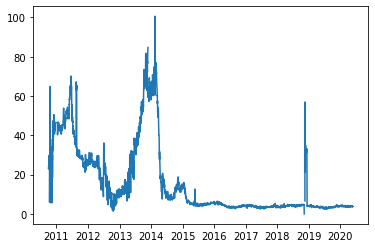

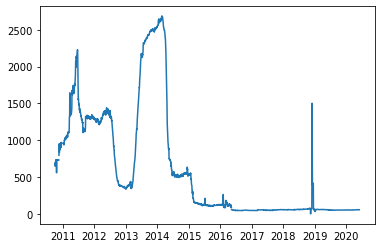

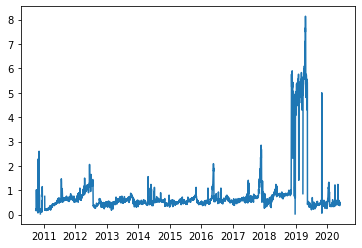

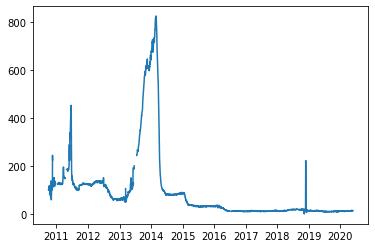

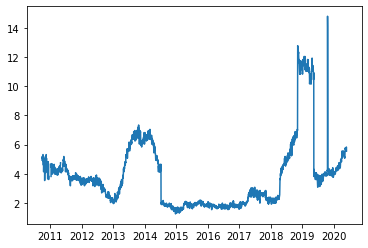

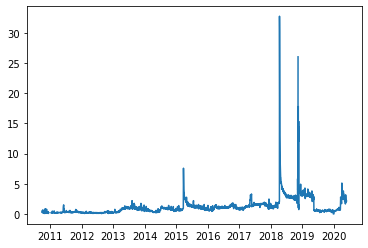

In [17]:
for i in ["AF-P08-P10", "AF-P05-P08", "AF-P10-P13", "AF-P01-P05", "AF-P17-P22", "AF-P22-P26"]:
    plt.subplots()
    plt.plot(filt[i])

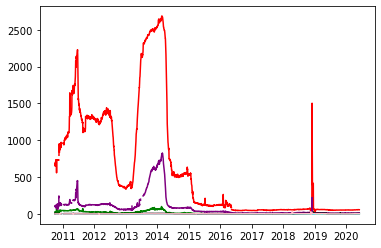

In [18]:
plt.plot(filt["AF-P08-P10"], color="green")
plt.plot(filt["AF-P05-P08"], color="red")
plt.plot(filt["AF-P10-P13"], color="cyan")
plt.plot(filt["AF-P01-P05"], color="purple")
plt.plot(filt["AF-P17-P22"], color="black")
plt.plot(filt["AF-P22-P26"], color="pink")

Reorganización del dataframe para que la fecha no constituya el índice (y no dé problemas).

In [19]:
filt['Fecha'] = filt.index
filt.reset_index(drop=True, inplace=True)
filt

,AF-P08-P10,AF-P05-P08,AF-P10-P13,AF-P01-P05,AF-P17-P22,AF-P22-P26,Fecha
0,23.27,664.72,0.19,100.96,4.93,0.34,2010-10-01
1,22.89,669.34,0.22,101.71,5.18,0.45,2010-10-02
2,24.92,676.30,0.23,105.10,5.06,0.54,2010-10-03
3,27.91,693.89,0.18,113.28,NaN,0.59,2010-10-04
4,26.39,677.46,0.16,107.40,5.09,0.18,2010-10-05
...,...,...,...,...,...,...,...
3480,3.91,57.47,0.45,13.99,5.56,2.35,2020-05-25
3481,4.07,57.47,0.45,14.22,5.70,2.28,2020-05-26
3482,3.97,57.47,0.51,14.10,5.83,2.28,2020-05-27
3483,3.91,57.21,0.45,13.77,5.63,2.16,2020-05-28


# VARIABLES EXTERIORES

Carga del dataset de variables exteriores.

In [20]:
df2 = pd.read_excel('Var. ext. G12.xlsx')
df2.head()

,Fecha,Sensor,Lectura,Unidades de Lectura,Medida,Unidades de Medida,Flag,Flag Manipulación,Observaciones
0,01/10/2010 07:00:00,E085Z03TEMPE,17.40,ºC,17.40,ºC,M,NC,NaN
1,01/10/2010 07:00:00,E085Z02NEMBA,283.88,m.s.n.m.,283.88,m.s.n.m.,M,NC,NaN
2,02/10/2010 07:00:00,E085Z03TEMPE,19.20,ºC,19.20,ºC,M,NC,NaN
3,02/10/2010 07:00:00,E085Z02NEMBA,283.88,m.s.n.m.,283.88,m.s.n.m.,M,NC,NaN
4,03/10/2010 07:00:00,E085Z03TEMPE,20.00,ºC,20.00,ºC,M,NC,NaN


Eliminación de las columnas irrelevantes.

In [21]:
del df2["Lectura"]
del df2["Unidades de Lectura"]
del df2["Unidades de Medida"]
del df2["Flag"]
del df2["Flag Manipulación"]
del df2["Observaciones"]

In [22]:
df2.head()

,Fecha,Sensor,Medida
0,01/10/2010 07:00:00,E085Z03TEMPE,17.40
1,01/10/2010 07:00:00,E085Z02NEMBA,283.88
2,02/10/2010 07:00:00,E085Z03TEMPE,19.20
3,02/10/2010 07:00:00,E085Z02NEMBA,283.88
4,03/10/2010 07:00:00,E085Z03TEMPE,20.00


In [23]:
df2.shape

(13807, 3)

Conversión de las fechas a formato datetime.

In [24]:
df2["Fecha"] = pd.to_datetime(df2["Fecha"], format ='%d/%m/%Y %H:%M:%S')
df2.head()

,Fecha,Sensor,Medida
0,2010-10-01 07:00:00,E085Z03TEMPE,17.40
1,2010-10-01 07:00:00,E085Z02NEMBA,283.88
2,2010-10-02 07:00:00,E085Z03TEMPE,19.20
3,2010-10-02 07:00:00,E085Z02NEMBA,283.88
4,2010-10-03 07:00:00,E085Z03TEMPE,20.00


Comprobación del número de sensores.

In [25]:
df2["Sensor"].unique()

array(['E085Z03TEMPE', 'E085Z02NEMBA', 'E085Z83PA24H', 'E085Z65VEMBA'],
      dtype=object)

Comprobación de los NaN.

In [26]:
for i in df2["Sensor"].unique():
    print(df2[df2["Sensor"]==i].isnull().sum())
    print("**************")

Fecha     0
Sensor    0
Medida    9
dtype: int64
**************
Fecha     0
Sensor    0
Medida    5
dtype: int64
**************
Fecha      0
Sensor     0
Medida    32
dtype: int64
**************
Fecha      0
Sensor     0
Medida    59
dtype: int64
**************


Creación de un nuevo dataframe con los valores de fecha y medida de cada sensor.

In [27]:
varext = pd.merge(df2[df2["Sensor"]=="E085Z03TEMPE"][["Fecha","Medida"]], df2[df2["Sensor"]=="E085Z02NEMBA"][["Fecha","Medida"]], on="Fecha", how="outer")
varext = pd.merge(varext, df2[df2["Sensor"]=="E085Z65VEMBA"][["Fecha","Medida"]], on = "Fecha", how="outer")
varext = pd.merge(varext, df2[df2["Sensor"]=="E085Z83PA24H"][["Fecha","Medida"]], on = "Fecha", how="outer")
varext.shape

(6768, 5)

In [28]:
varext.head()

,Fecha,Medida_x,Medida_y,Medida_x,Medida_y
0,2010-10-01 07:00:00,17.4,283.88,NaN,NaN
1,2010-10-02 07:00:00,19.2,283.88,NaN,NaN
2,2010-10-03 07:00:00,20.0,283.88,NaN,NaN
3,2010-10-04 07:00:00,20.3,283.88,NaN,NaN
4,2010-10-05 07:00:00,15.7,283.87,NaN,NaN


Modificación del nombre de las columnas.

In [29]:
varext.columns = ["Fecha","Temperatura","Nivel embalse","Volumen embalse","Precipitaciones"]

In [30]:
varext.shape

(6768, 5)

Convergencia de las fechas duplicadas mediante una media.

In [31]:
varext = varext.resample('d', on='Fecha').mean().dropna(how='all')
varext

,Temperatura,Nivel embalse,Volumen embalse,Precipitaciones
Fecha,,,,
2010-10-01,17.4,283.88,NaN,NaN
2010-10-02,19.2,283.88,NaN,NaN
2010-10-03,20.0,283.88,NaN,NaN
2010-10-04,20.3,283.88,NaN,0.5
2010-10-05,15.7,283.87,NaN,1.0
...,...,...,...,...
2020-05-25,21.9,283.89,63.02,0.0
2020-05-26,20.5,283.93,63.37,1.8
2020-05-27,24.0,283.97,63.72,0.0


Generación de gráficos.

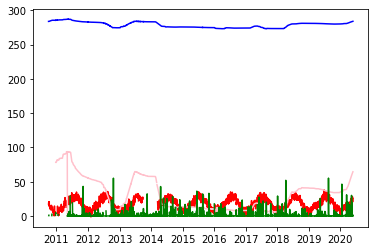

In [32]:
plt.plot(varext["Temperatura"], color = "red")
plt.plot(varext["Nivel embalse"], color = "blue")
plt.plot(varext["Volumen embalse"], color = "pink")
plt.plot(varext["Precipitaciones"], color = "green")

Reorganización del dataframe para que la fecha no constituya el índice (y no dé problemas).

In [33]:
varext['Fecha'] = varext.index
varext.reset_index(drop=True, inplace=True)
varext

,Temperatura,Nivel embalse,Volumen embalse,Precipitaciones,Fecha
0,17.4,283.88,NaN,NaN,2010-10-01
1,19.2,283.88,NaN,NaN,2010-10-02
2,20.0,283.88,NaN,NaN,2010-10-03
3,20.3,283.88,NaN,0.5,2010-10-04
4,15.7,283.87,NaN,1.0,2010-10-05
...,...,...,...,...,...
3507,21.9,283.89,63.02,0.0,2020-05-25
3508,20.5,283.93,63.37,1.8,2020-05-26
3509,24.0,283.97,63.72,0.0,2020-05-27
3510,25.3,284.01,64.08,0.0,2020-05-28


# PRESIONES

Carga del dataset de las presiones.

In [34]:
df3 = pd.read_excel("Presiones G12.xlsx")
df3.head()

,Fecha,Sensor,Lectura,Unidades de Lectura,Medida,Unidades de Medida,Flag,Flag Manipulación,Observaciones
0,01/10/2010 07:00:00,E085ZUPCVP57,0.0,Hz,1.64,kg/cm²,M,NC,NaN
1,01/10/2010 07:00:00,E085ZUPCVP66,0.0,Hz,0.97,kg/cm²,M,NC,NaN
2,01/10/2010 07:00:00,E085ZUPCVP75,0.0,Hz,1.61,kg/cm²,M,NC,NaN
3,01/10/2010 07:00:00,E085ZUPCVP76,0.0,Hz,1.61,kg/cm²,M,NC,NaN
4,01/10/2010 07:00:00,E085ZUPCVP84,0.0,Hz,0.02,kg/cm²,M,NC,NaN


Eliminación de las columnas irrelevantes.

In [35]:
del df3["Lectura"]
del df3["Unidades de Lectura"]
del df3["Unidades de Medida"]
del df3["Flag"]
del df3["Flag Manipulación"]
del df3["Observaciones"]

In [36]:
df3.head()

,Fecha,Sensor,Medida
0,01/10/2010 07:00:00,E085ZUPCVP57,1.64
1,01/10/2010 07:00:00,E085ZUPCVP66,0.97
2,01/10/2010 07:00:00,E085ZUPCVP75,1.61
3,01/10/2010 07:00:00,E085ZUPCVP76,1.61
4,01/10/2010 07:00:00,E085ZUPCVP84,0.02


In [37]:
df3.shape

(279997, 3)

Conversión de las fechas a formato datetime.

In [38]:
df3["Fecha"] = pd.to_datetime(df3["Fecha"], format ='%d/%m/%Y %H:%M:%S')
df3.head()

,Fecha,Sensor,Medida
0,2010-10-01 07:00:00,E085ZUPCVP57,1.64
1,2010-10-01 07:00:00,E085ZUPCVP66,0.97
2,2010-10-01 07:00:00,E085ZUPCVP75,1.61
3,2010-10-01 07:00:00,E085ZUPCVP76,1.61
4,2010-10-01 07:00:00,E085ZUPCVP84,0.02


Comprobación del número de piezómetros.

In [39]:
df3["Sensor"].unique()

array(['E085ZUPCVP57', 'E085ZUPCVP66', 'E085ZUPCVP75', 'E085ZUPCVP76',
       'E085ZUPCVP84', 'E085ZUPCVP26', 'E085ZUPCVP36', 'E085ZUPCVP60',
       'E085ZUPCVP77', 'E085ZUPCVP06', 'E085ZUPCVP39', 'E085ZUPCVP48',
       'E085ZUPCVP53', 'E085ZUPCVP55', 'E085ZUPCVP82', 'E085ZUPCVP83',
       'E085ZUPCVP87', 'E085ZUPCVP19', 'E085ZUPCVP50', 'E085ZUPCVP72',
       'E085ZUPCVP02', 'E085ZUPCVP03', 'E085ZUPCVP33', 'E085ZUPCVP14',
       'E085ZUPCVP18', 'E085ZUPCVP65', 'E085ZUPCVP69', 'E085ZUPCVP74',
       'E085ZUPCVP86', 'E085ZUPCVP21', 'E085ZUPCVP27', 'E085ZUPCVP32',
       'E085ZUPCVP44', 'E085ZUPCVP54', 'E085ZUPCVP62', 'E085ZUPCVP79',
       'E085ZUPCVP28', 'E085ZUPCVP29', 'E085ZUPCVP08', 'E085ZUPCVP34',
       'E085ZUPCVP15', 'E085ZUPCVP11', 'E085ZUPCVP67', 'E085ZUPCVP71',
       'E085ZUPCVP73', 'E085ZUPCVP16', 'E085ZUPCVP20', 'E085ZUPCVP63',
       'E085ZUPCVP23', 'E085ZUPCVP31', 'E085ZUPCVP35', 'E085ZUPCVP38',
       'E085ZUPCVP40', 'E085ZUPCVP41', 'E085ZUPCVP17', 'E085ZUPCVP46',
      

Selección de los valores de los piezómetros más importantes.

In [40]:
df3 = df3[df3["Sensor"].isin(["E085ZUPCVP07", "E085ZUPCVP16","E085ZUPCVP31","E085ZUPCVP34","E085ZUPCVP49", "E085ZUPCVP52","E085ZUPCVP67","E085ZUPCVP70","E085ZUPCVP79"])]

In [41]:
df3

,Fecha,Sensor,Medida
35,2010-10-01 07:00:00,E085ZUPCVP79,0.15
39,2010-10-01 07:00:00,E085ZUPCVP34,0.86
42,2010-10-01 07:00:00,E085ZUPCVP67,0.13
45,2010-10-01 07:00:00,E085ZUPCVP16,0.20
49,2010-10-01 07:00:00,E085ZUPCVP31,0.76
...,...,...,...
279963,2020-05-29 07:00:00,E085ZUPCVP16,0.75
279967,2020-05-29 07:00:00,E085ZUPCVP31,1.41
279975,2020-05-29 07:00:00,E085ZUPCVP49,1.21
279989,2020-05-29 07:00:00,E085ZUPCVP07,0.28


Comprobación de los NaN.

In [42]:
for i in df3["Sensor"].unique():
    print(df3[df3["Sensor"]==i].isnull().sum())
    print("**************")

Fecha      0
Sensor     0
Medida    32
dtype: int64
**************
Fecha      0
Sensor     0
Medida    27
dtype: int64
**************
Fecha       0
Sensor      0
Medida    195
dtype: int64
**************
Fecha      0
Sensor     0
Medida    15
dtype: int64
**************
Fecha      0
Sensor     0
Medida    27
dtype: int64
**************
Fecha      0
Sensor     0
Medida    29
dtype: int64
**************
Fecha     0
Sensor    0
Medida    6
dtype: int64
**************
Fecha      0
Sensor     0
Medida    29
dtype: int64
**************
Fecha       0
Sensor      0
Medida    347
dtype: int64
**************


Reorganización del dataframe para que los sensores se conviertan en columnas.

In [43]:
pres = df3.pivot_table(values='Medida', index='Fecha', columns='Sensor')
pres.head(3)

Sensor,E085ZUPCVP07,E085ZUPCVP16,E085ZUPCVP31,E085ZUPCVP34,E085ZUPCVP49,E085ZUPCVP52,E085ZUPCVP67,E085ZUPCVP70,E085ZUPCVP79
Fecha,,,,,,,,,
2010-10-01 07:00:00,0.11,0.20,0.76,0.86,0.55,0.87,0.13,NaN,0.15
2010-10-02 07:00:00,0.11,0.18,0.76,0.86,0.55,0.87,0.13,NaN,0.14
2010-10-03 07:00:00,0.13,0.20,0.76,0.86,0.55,0.87,0.18,NaN,0.14


Reorganización del dataframe para que la fecha no constituya el índice (y no dé problemas).

In [44]:
pres['Fecha'] = pres.index
pres.reset_index(drop=True, inplace=True)
pres.head()

Sensor,E085ZUPCVP07,E085ZUPCVP16,E085ZUPCVP31,E085ZUPCVP34,E085ZUPCVP49,E085ZUPCVP52,E085ZUPCVP67,E085ZUPCVP70,E085ZUPCVP79,Fecha
0,0.11,0.20,0.76,0.86,0.55,0.87,0.13,NaN,0.15,2010-10-01 07:00:00
1,0.11,0.18,0.76,0.86,0.55,0.87,0.13,NaN,0.14,2010-10-02 07:00:00
2,0.13,0.20,0.76,0.86,0.55,0.87,0.18,NaN,0.14,2010-10-03 07:00:00
3,0.11,0.20,0.76,0.86,0.55,0.87,0.16,NaN,0.15,2010-10-04 07:00:00
4,0.11,0.20,0.76,0.86,0.56,0.87,0.13,NaN,0.15,2010-10-05 07:00:00


Convergencia de las fechas duplicadas mediante una media.

In [45]:
pres=pres.resample('d', on="Fecha").mean().dropna(how='all')
pres.head()

Sensor,E085ZUPCVP07,E085ZUPCVP16,E085ZUPCVP31,E085ZUPCVP34,E085ZUPCVP49,E085ZUPCVP52,E085ZUPCVP67,E085ZUPCVP70,E085ZUPCVP79
Fecha,,,,,,,,,
2010-10-01,0.11,0.20,0.76,0.86,0.55,0.87,0.13,NaN,0.15
2010-10-02,0.11,0.18,0.76,0.86,0.55,0.87,0.13,NaN,0.14
2010-10-03,0.13,0.20,0.76,0.86,0.55,0.87,0.18,NaN,0.14
2010-10-04,0.11,0.20,0.76,0.86,0.55,0.87,0.16,NaN,0.15
2010-10-05,0.11,0.20,0.76,0.86,0.56,0.87,0.13,NaN,0.15


Reorganización del dataframe para que la fecha no constituya el índice (y no dé problemas).

In [46]:
pres['Fecha'] = pres.index
pres.reset_index(drop=True, inplace=True)
pres.head()

Sensor,E085ZUPCVP07,E085ZUPCVP16,E085ZUPCVP31,E085ZUPCVP34,E085ZUPCVP49,E085ZUPCVP52,E085ZUPCVP67,E085ZUPCVP70,E085ZUPCVP79,Fecha
0,0.11,0.20,0.76,0.86,0.55,0.87,0.13,NaN,0.15,2010-10-01
1,0.11,0.18,0.76,0.86,0.55,0.87,0.13,NaN,0.14,2010-10-02
2,0.13,0.20,0.76,0.86,0.55,0.87,0.18,NaN,0.14,2010-10-03
3,0.11,0.20,0.76,0.86,0.55,0.87,0.16,NaN,0.15,2010-10-04
4,0.11,0.20,0.76,0.86,0.56,0.87,0.13,NaN,0.15,2010-10-05


Conversión de los valores de presión negativos a 0 (una presión negativa no tiene sentido).

In [47]:
num = pres._get_numeric_data()
num[num._get_numeric_data() < 0] = 0
pres.head()

Sensor,E085ZUPCVP07,E085ZUPCVP16,E085ZUPCVP31,E085ZUPCVP34,E085ZUPCVP49,E085ZUPCVP52,E085ZUPCVP67,E085ZUPCVP70,E085ZUPCVP79,Fecha
0,0.11,0.20,0.76,0.86,0.55,0.87,0.13,NaN,0.15,2010-10-01
1,0.11,0.18,0.76,0.86,0.55,0.87,0.13,NaN,0.14,2010-10-02
2,0.13,0.20,0.76,0.86,0.55,0.87,0.18,NaN,0.14,2010-10-03
3,0.11,0.20,0.76,0.86,0.55,0.87,0.16,NaN,0.15,2010-10-04
4,0.11,0.20,0.76,0.86,0.56,0.87,0.13,NaN,0.15,2010-10-05


Generación de gráficos.

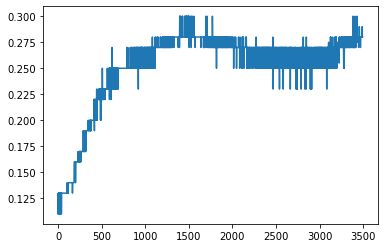

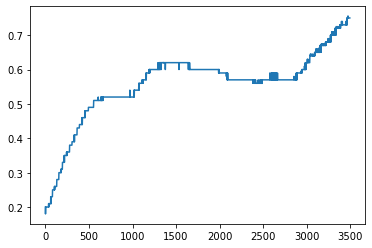

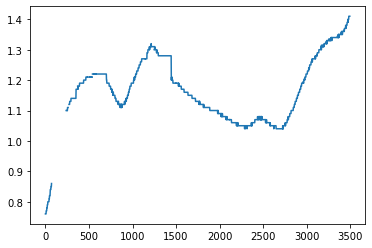

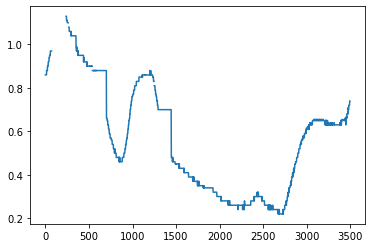

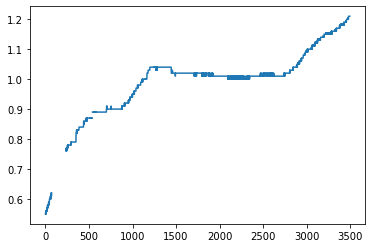

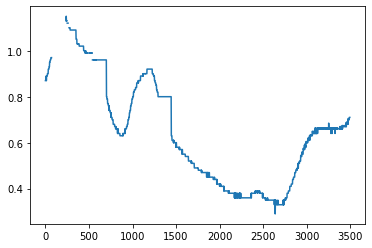

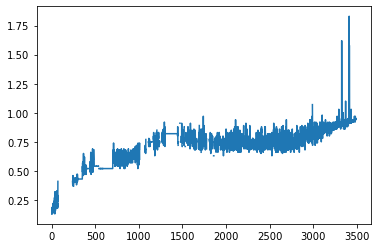

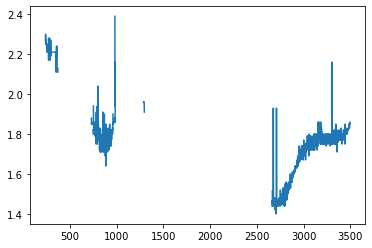

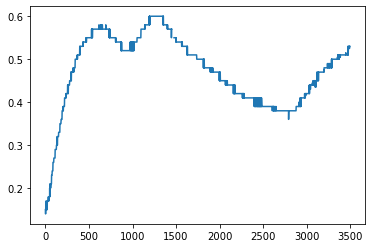

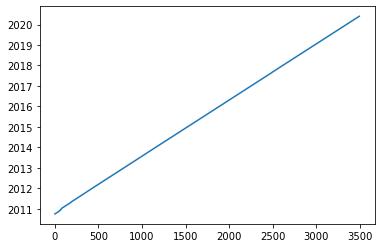

In [48]:
for i in pres.columns:
    plt.subplots()
    plt.plot(pres[i])

Comprobación de los NaN.

In [49]:
for i in pres.columns:
    print(pres[i].isnull().sum())
    print("**************")

4
**************
10
**************
218
**************
218
**************
220
**************
220
**************
491
**************
2309
**************
26
**************
0
**************


Eliminación de los valores de los piezómetros con mayor número de NaN.

In [50]:
del pres["E085ZUPCVP67"]

In [51]:
pres.head()

Sensor,E085ZUPCVP07,E085ZUPCVP16,E085ZUPCVP31,E085ZUPCVP34,E085ZUPCVP49,E085ZUPCVP52,E085ZUPCVP70,E085ZUPCVP79,Fecha
0,0.11,0.20,0.76,0.86,0.55,0.87,NaN,0.15,2010-10-01
1,0.11,0.18,0.76,0.86,0.55,0.87,NaN,0.14,2010-10-02
2,0.13,0.20,0.76,0.86,0.55,0.87,NaN,0.14,2010-10-03
3,0.11,0.20,0.76,0.86,0.55,0.87,NaN,0.15,2010-10-04
4,0.11,0.20,0.76,0.86,0.56,0.87,NaN,0.15,2010-10-05


# DATAFRAME UNIFICADO

In [52]:
filt.head(2), filt.shape

(   AF-P08-P10  AF-P05-P08  AF-P10-P13  AF-P01-P05  AF-P17-P22  AF-P22-P26  \
 0       23.27      664.72        0.19      100.96        4.93        0.34   
 1       22.89      669.34        0.22      101.71        5.18        0.45   
 
        Fecha  
 0 2010-10-01  
 1 2010-10-02  ,
 (3485, 7))

In [53]:
varext.head(2), varext.shape

(   Temperatura  Nivel embalse  Volumen embalse  Precipitaciones      Fecha
 0         17.4         283.88              NaN              NaN 2010-10-01
 1         19.2         283.88              NaN              NaN 2010-10-02,
 (3512, 5))

In [54]:
pres.head(2), pres.shape

(Sensor  E085ZUPCVP07  E085ZUPCVP16  E085ZUPCVP31  E085ZUPCVP34  E085ZUPCVP49  \
 0               0.11          0.20          0.76          0.86          0.55   
 1               0.11          0.18          0.76          0.86          0.55   
 
 Sensor  E085ZUPCVP52  E085ZUPCVP70  E085ZUPCVP79      Fecha  
 0               0.87           NaN          0.15 2010-10-01  
 1               0.87           NaN          0.14 2010-10-02  ,
 (3494, 9))

In [55]:
g12 = pd.merge(filt, varext, on= "Fecha", how="outer")

In [56]:
g12.head(2)

,AF-P08-P10,AF-P05-P08,AF-P10-P13,AF-P01-P05,AF-P17-P22,AF-P22-P26,Fecha,Temperatura,Nivel embalse,Volumen embalse,Precipitaciones
0,23.27,664.72,0.19,100.96,4.93,0.34,2010-10-01,17.4,283.88,NaN,NaN
1,22.89,669.34,0.22,101.71,5.18,0.45,2010-10-02,19.2,283.88,NaN,NaN


In [57]:
g12 = pd.merge(g12, pres, on ="Fecha", how= "outer")
g12.head(2)

,AF-P08-P10,AF-P05-P08,AF-P10-P13,AF-P01-P05,AF-P17-P22,AF-P22-P26,Fecha,Temperatura,Nivel embalse,Volumen embalse,Precipitaciones,E085ZUPCVP07,E085ZUPCVP16,E085ZUPCVP31,E085ZUPCVP34,E085ZUPCVP49,E085ZUPCVP52,E085ZUPCVP70,E085ZUPCVP79
0,23.27,664.72,0.19,100.96,4.93,0.34,2010-10-01,17.4,283.88,NaN,NaN,0.11,0.20,0.76,0.86,0.55,0.87,NaN,0.15
1,22.89,669.34,0.22,101.71,5.18,0.45,2010-10-02,19.2,283.88,NaN,NaN,0.11,0.18,0.76,0.86,0.55,0.87,NaN,0.14


In [58]:
g12.reset_index(drop=True, inplace=True)
g12.head(2)

,AF-P08-P10,AF-P05-P08,AF-P10-P13,AF-P01-P05,AF-P17-P22,AF-P22-P26,Fecha,Temperatura,Nivel embalse,Volumen embalse,Precipitaciones,E085ZUPCVP07,E085ZUPCVP16,E085ZUPCVP31,E085ZUPCVP34,E085ZUPCVP49,E085ZUPCVP52,E085ZUPCVP70,E085ZUPCVP79
0,23.27,664.72,0.19,100.96,4.93,0.34,2010-10-01,17.4,283.88,NaN,NaN,0.11,0.20,0.76,0.86,0.55,0.87,NaN,0.15
1,22.89,669.34,0.22,101.71,5.18,0.45,2010-10-02,19.2,283.88,NaN,NaN,0.11,0.18,0.76,0.86,0.55,0.87,NaN,0.14


In [59]:
g12.shape

(3517, 19)

In [60]:
g12.isnull().sum()

AF-P08-P10           45
AF-P05-P08           44
AF-P10-P13           50
AF-P01-P05          147
AF-P17-P22           36
AF-P22-P26           41
Fecha                 0
Temperatura         209
Nivel embalse        40
Volumen embalse     158
Precipitaciones     300
E085ZUPCVP07         27
E085ZUPCVP16         33
E085ZUPCVP31        241
E085ZUPCVP34        241
E085ZUPCVP49        243
E085ZUPCVP52        243
E085ZUPCVP70       2332
E085ZUPCVP79         49
dtype: int64

In [61]:
g12.columns

Index(['AF-P08-P10', 'AF-P05-P08', 'AF-P10-P13', 'AF-P01-P05', 'AF-P17-P22',
       'AF-P22-P26', 'Fecha', 'Temperatura', 'Nivel embalse',
       'Volumen embalse', 'Precipitaciones', 'E085ZUPCVP07', 'E085ZUPCVP16',
       'E085ZUPCVP31', 'E085ZUPCVP34', 'E085ZUPCVP49', 'E085ZUPCVP52',
       'E085ZUPCVP70', 'E085ZUPCVP79'],
      dtype='object')

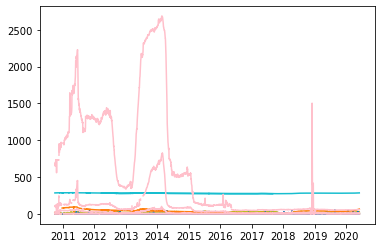

In [62]:
plt.plot(g12.Fecha,g12.E085ZUPCVP07)
plt.plot(g12.Fecha,g12.E085ZUPCVP16)
plt.plot(g12.Fecha,g12.E085ZUPCVP31)
plt.plot(g12.Fecha,g12.E085ZUPCVP34)
plt.plot(g12.Fecha,g12.E085ZUPCVP49)
plt.plot(g12.Fecha,g12.E085ZUPCVP52)
plt.plot(g12.Fecha,g12.E085ZUPCVP70)
plt.plot(g12.Fecha,g12.E085ZUPCVP79)

plt.plot(g12.Fecha,g12["Temperatura"])
plt.plot(g12.Fecha,g12["Nivel embalse"])
plt.plot(g12.Fecha,g12["Precipitaciones"])
plt.plot(g12.Fecha,g12["Volumen embalse"])

plt.plot(g12.Fecha,g12["AF-P01-P05"], color="pink")
plt.plot(g12.Fecha,g12["AF-P05-P08"], color="pink")
plt.plot(g12.Fecha,g12["AF-P08-P10"], color="pink")
plt.plot(g12.Fecha,g12["AF-P10-P13"], color="pink")
plt.plot(g12.Fecha,g12["AF-P17-P22"], color="pink")
plt.plot(g12.Fecha,g12["AF-P22-P26"], color="pink")

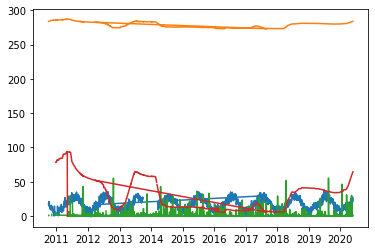

In [63]:
plt.plot(g12.Fecha,g12["Temperatura"])
plt.plot(g12.Fecha,g12["Nivel embalse"])
plt.plot(g12.Fecha,g12["Precipitaciones"])
plt.plot(g12.Fecha,g12["Volumen embalse"])

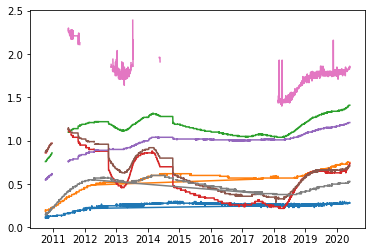

In [64]:
plt.plot(g12.Fecha,g12.E085ZUPCVP07)
plt.plot(g12.Fecha,g12.E085ZUPCVP16)
plt.plot(g12.Fecha,g12.E085ZUPCVP31)
plt.plot(g12.Fecha,g12.E085ZUPCVP34)
plt.plot(g12.Fecha,g12.E085ZUPCVP49)
plt.plot(g12.Fecha,g12.E085ZUPCVP52)
plt.plot(g12.Fecha,g12.E085ZUPCVP70)
plt.plot(g12.Fecha,g12.E085ZUPCVP79)

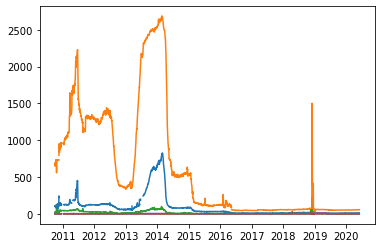

In [65]:
plt.plot(g12.Fecha,g12["AF-P01-P05"])
plt.plot(g12.Fecha,g12["AF-P05-P08"])
plt.plot(g12.Fecha,g12["AF-P08-P10"])
plt.plot(g12.Fecha,g12["AF-P10-P13"])
plt.plot(g12.Fecha,g12["AF-P17-P22"])
plt.plot(g12.Fecha,g12["AF-P22-P26"])

Gráficos para la presentación.

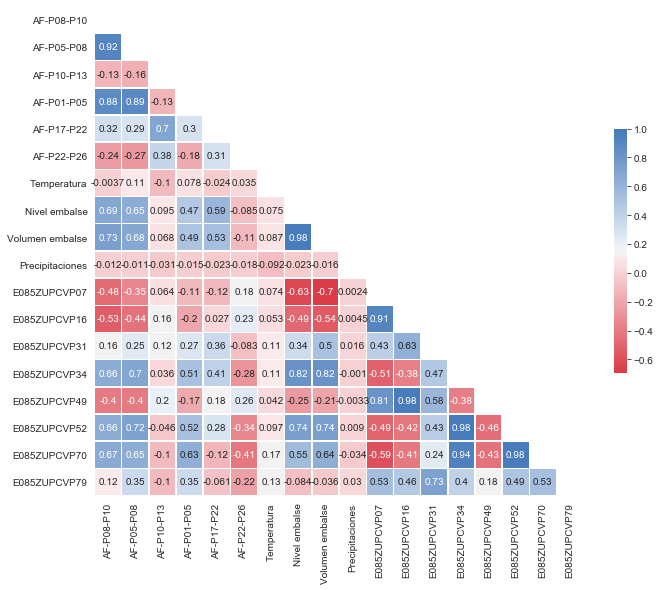

In [70]:
corr = g12.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True, annot=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [75]:
varext = varext.drop(varext[(varext["Fecha"] > "2018-10-01")].index)
filt = filt.drop(filt[(filt["Fecha"] > "2018-10-01")].index)

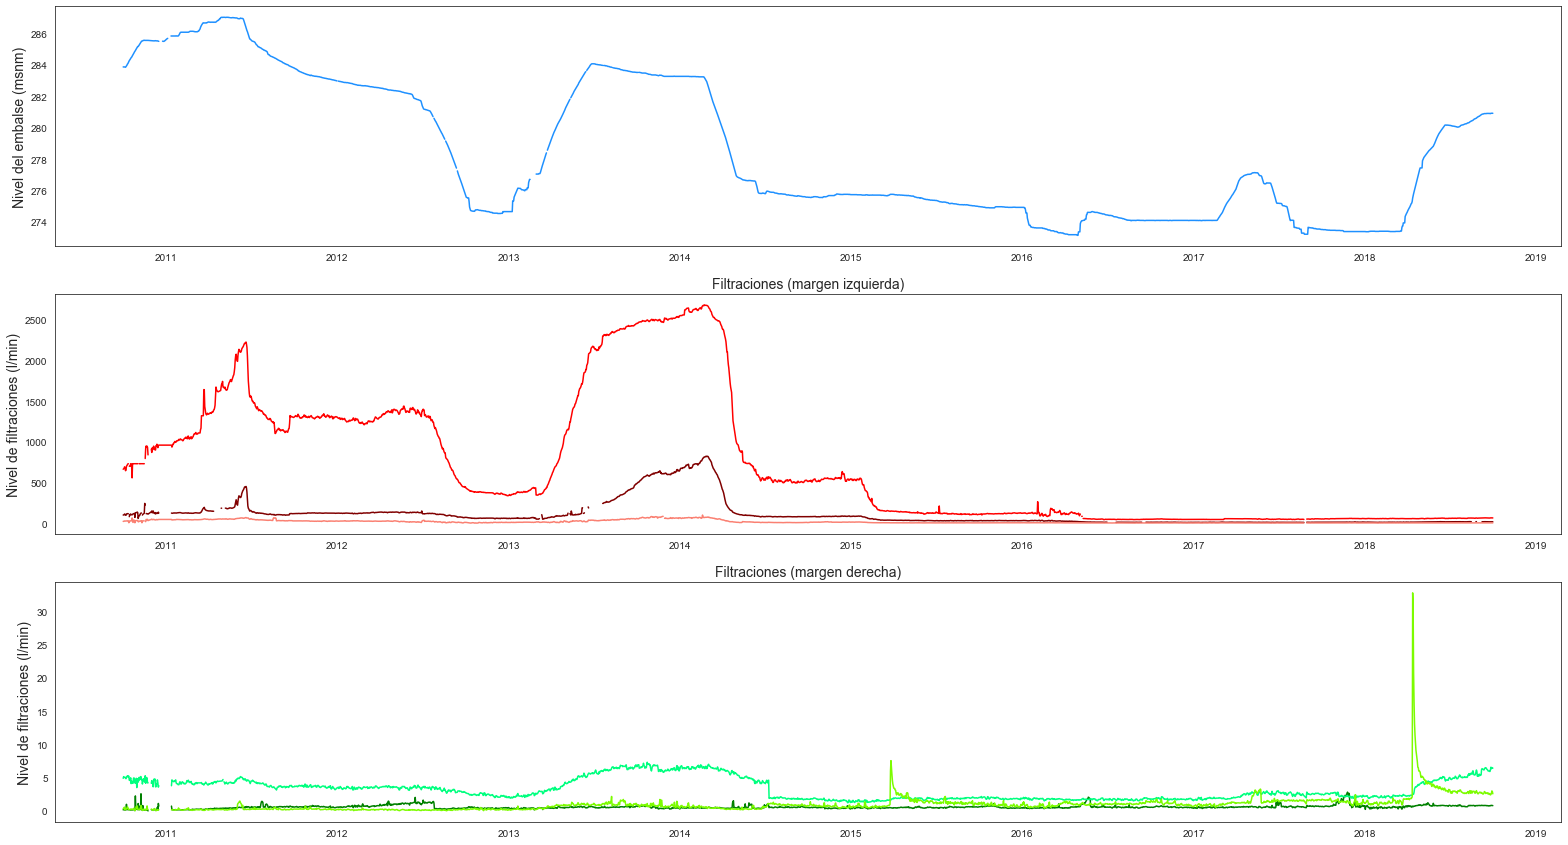

In [85]:
plt.figure(figsize=(27,15))
plt.subplot(3,1,1)
plt.plot(varext.Fecha, varext["Nivel embalse"], color='dodgerblue')
plt.ylabel('Nivel del embalse (msnm)', fontsize=14)
plt.subplot(3,1,2)
plt.plot(filt.Fecha, filt["AF-P01-P05"], color='maroon')
plt.plot(filt.Fecha, filt["AF-P05-P08"], color='r')
plt.plot(filt.Fecha, filt["AF-P08-P10"], color='salmon')
plt.title('Filtraciones (margen izquierda)', fontsize=14)
plt.ylabel('Nivel de filtraciones (l/min)', fontsize=14)
plt.subplot(3,1,3)
plt.plot(filt.Fecha, filt["AF-P10-P13"], color='green')
plt.plot(filt.Fecha, filt["AF-P17-P22"], color='springgreen')
plt.plot(filt.Fecha, filt["AF-P22-P26"], color='lawngreen')
plt.title('Filtraciones (margen derecha)', fontsize=14)
plt.ylabel('Nivel de filtraciones (l/min)', fontsize=14)
plt.show()